In [1]:
## Poner que hay que hacer para llegar a esto (ejem: un rompecabezas)
import numpy as np

In [2]:
from scipy import ndimage
from scipy import misc

In [3]:
import matplotlib.pyplot as plt

In [4]:
mapache = misc.face() # Es una matriz de 3 dimensiones

In [5]:
m1, m2, m3 = np.split(mapache, 3)

In [6]:
p1, p2, p3, p4 = np.hsplit(m1,4)
a1, a2, a3, a4 = np.hsplit(m2,4)
c1, c2, c3, c4 = np.hsplit(m3,4)

In [7]:
rompecabezas = {
    "1": p1,
    "2": p2,
    "3": p3,
    "4": p4,
    "5": a1,
    "6": a2,
    "7": a3,
    "8": a4,
    "9": c1,
    "10": c2,
    "11": c3,
    "12": c4,
}

In [8]:
def ver_tablero_mapache(tablero):
    p = tablero.flatten()
    figura, tablero = plt.subplots(3,4)
    tablero[0,0].imshow(rompecabezas[p[0]])
    tablero[0,1].imshow(rompecabezas[p[1]])
    tablero[0,2].imshow(rompecabezas[p[2]])
    tablero[0,3].imshow(rompecabezas[p[3]])
    tablero[1,0].imshow(rompecabezas[p[4]])
    tablero[1,1].imshow(rompecabezas[p[5]])
    tablero[1,2].imshow(rompecabezas[p[6]])
    tablero[1,3].imshow(rompecabezas[p[7]])
    tablero[2,0].imshow(rompecabezas[p[8]])
    tablero[2,1].imshow(rompecabezas[p[9]])
    tablero[2,2].imshow(rompecabezas[p[10]])
    tablero[2,3].imshow(rompecabezas[p[11]])
    plt.show()

In [9]:
def nuevo_tablero():
    array_aleatorio = np.random.permutation(np.arange(1,13))
    tablero = np.array(list(map(to_string, array_aleatorio)))
    return tablero.reshape(3,4)

In [10]:
def comprobarCompletado(tablero):
    array_tablero = tablero.flatten()
    array_tablero_ordenado = np.array(list(map(to_string, np.arange(1,13))))
    puntos_error = 0
    condicion_son_iguales = array_tablero == array_tablero_ordenado
    for condicion in condicion_son_iguales:
        if(condicion != True):
            puntos_error = puntos_error + 1
    if(puntos_error != 0):
        return False
    else:
        return True

In [11]:
def intercambiarPosiciones(tablero, pieza1, pieza2):
    tablero_intercambio = tablero.flatten()
    indp1 = np.where(tablero_intercambio==pieza1)
    indp2 = np.where(tablero_intercambio==pieza2)
    tablero_intercambio[indp1[0]] = pieza2
    tablero_intercambio[indp2[0]] = pieza1
    return tablero_intercambio.reshape(3,4)

In [12]:
 def to_string(valor):
    return str(valor)

In [26]:
def principal():
    estaJugando = True
    tablero_pos = nuevo_tablero()
    while(estaJugando):
        print("\nROMPECABEZAS DEL MAPACHE\n")
        print("Posiciones de las piezas\n")
        print(np.matrix(tablero_pos))
        print("\nTablero del Mapache\n")
        ver_tablero_mapache(tablero_pos)
        print("\n**MENU**\n")
        print("1 - Mostrar Mapache")
        print("2 - Intercambiar piezas")
        print("3 - Salir")
        opcion_menu = input("\nDigite una opción: ")
        if (opcion_menu):
            if(opcion_menu == "1"):
                mostrar_mapache()
            elif (opcion_menu == "2"):
                tablero_pos, estaJugando = intercambio_piezas(tablero_pos, estaJugando)
            elif (opcion_menu == "3"):
                print("¡Gracias por jugar!")
                estaJugando = False
            else:
                print("\n¡Entrada no valida!\n")
                
        else:
            print("\n¡Por favor, escoja una de las opciones!\n")

In [14]:
def mostrar_mapache():
    plt.imshow(mapache)
    plt.show()

In [23]:
def intercambio_piezas(tablero_pos, estaJugando):
    print("\nDigite el par de piezas a intercambiar\n")
    pos1 = input("Posición 1ra pieza: ")
    pos2 = input("Posición 2da pieza: ")
    try:
        posicion1 = int(pos1)
        posicion2 = int(pos2)
        if(posicion1 > 0 and posicion1 < 13 and posicion2 > 0 and posicion2 < 13):
            tablero_pos = intercambiarPosiciones(tablero_pos, pos1, pos2)
            print(f"\n*Las piezas {posicion1} y {posicion2} han sido intercambiados*\n")
            if(comprobarCompletado(tablero_pos)):
                print("\nRompecabezas Completado\n")
                ver_tablero_mapache(tablero_pos)
                estaJugando = False
            return tablero_pos, estaJugando
        else:
            print("*El elemento no esta en la lista*\n")
            return tablero_pos, estaJugando
    except Exception as error:
            print("*Ingrese solo numeros*\n")
            return tablero_pos, estaJugando


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['10' '6' '1' '2']
 ['11' '3' '9' '12']
 ['8' '7' '4' '5']]

Tablero del Mapache



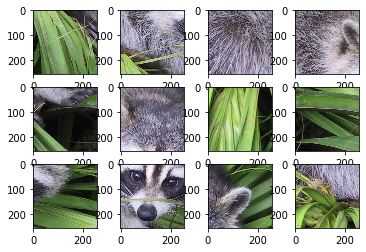


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 1


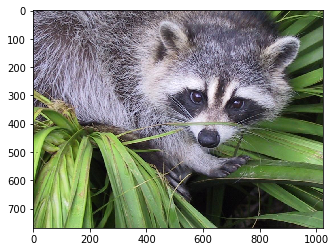


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['10' '6' '1' '2']
 ['11' '3' '9' '12']
 ['8' '7' '4' '5']]

Tablero del Mapache



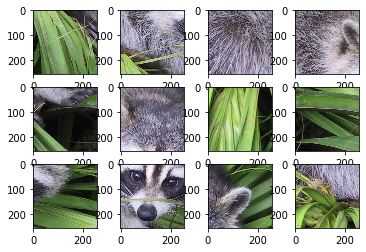


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 1
Escriba el segundo elemento: 10

***Los elementos 1 y 10 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '6' '10' '2']
 ['11' '3' '9' '12']
 ['8' '7' '4' '5']]

Tablero del Mapache



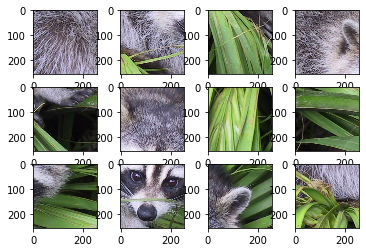


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 6
Escriba el segundo elemento: 2

***Los elementos 6 y 2 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '10' '6']
 ['11' '3' '9' '12']
 ['8' '7' '4' '5']]

Tablero del Mapache



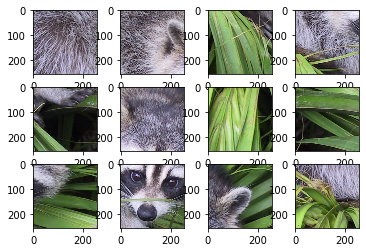


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 10
Escriba el segundo elemento: 3

***Los elementos 10 y 3 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '6']
 ['11' '10' '9' '12']
 ['8' '7' '4' '5']]

Tablero del Mapache



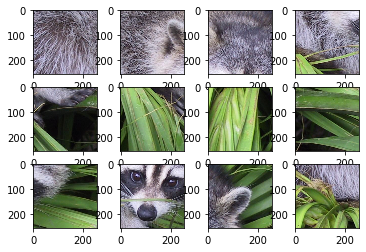


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 6
Escriba el segundo elemento: 4

***Los elementos 6 y 4 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['11' '10' '9' '12']
 ['8' '7' '6' '5']]

Tablero del Mapache



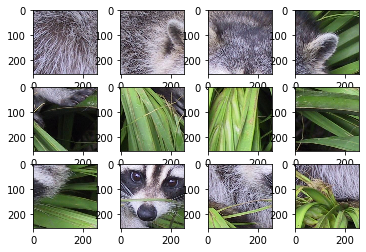


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 11
Escriba el segundo elemento: 5

***Los elementos 11 y 5 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '10' '9' '12']
 ['8' '7' '6' '11']]

Tablero del Mapache



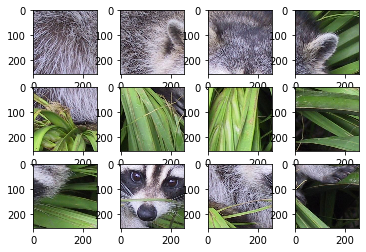


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 10
Escriba el segundo elemento: 6

***Los elementos 10 y 6 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '6' '9' '12']
 ['8' '7' '10' '11']]

Tablero del Mapache



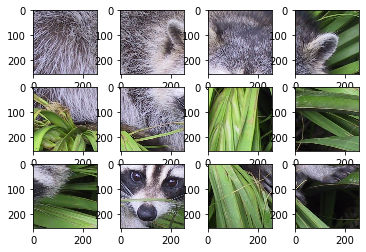


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 
¡Opción no valida!

ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '6' '9' '12']
 ['8' '7' '10' '11']]

Tablero del Mapache



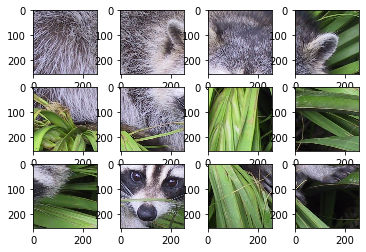


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 9
Escriba el segundo elemento: 7

***Los elementos 9 y 7 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '6' '7' '12']
 ['8' '9' '10' '11']]

Tablero del Mapache



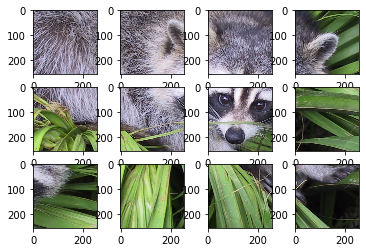


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 12
Escriba el segundo elemento: 8

***Los elementos 12 y 8 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '6' '7' '8']
 ['12' '9' '10' '11']]

Tablero del Mapache



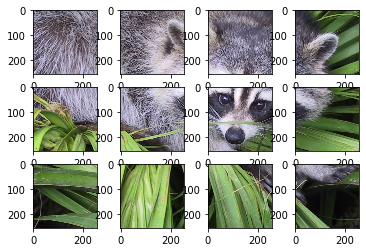


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 9
Escriba el segundo elemento: 11

***Los elementos 9 y 11 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '6' '7' '8']
 ['12' '11' '10' '9']]

Tablero del Mapache



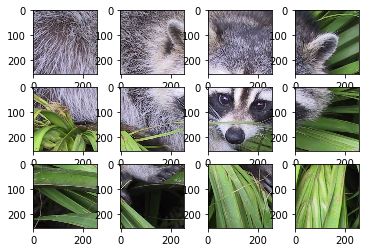


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 9
Escriba el segundo elemento: 12

***Los elementos 9 y 12 han sido intercambiados***


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '6' '7' '8']
 ['9' '11' '10' '12']]

Tablero del Mapache



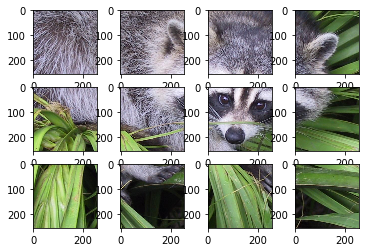


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Ingrese los elementos a intercambiar

Escriba el primer elemento: 10
Escriba el segundo elemento: 11

***Los elementos 10 y 11 han sido intercambiados***

Rompecabezas Completado


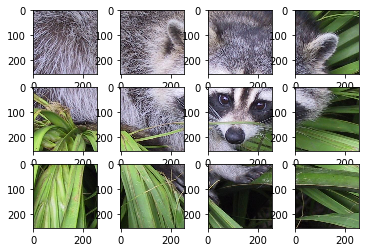


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['1' '2' '3' '4']
 ['5' '6' '7' '8']
 ['9' '10' '11' '12']]

Tablero del Mapache



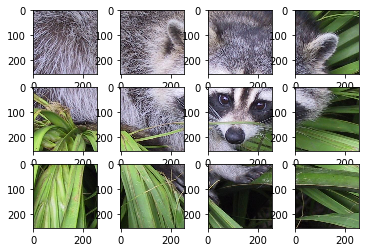


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 3
¡Gracias por jugar!


In [22]:
principal()


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['8' '5' '1' '12']
 ['4' '2' '10' '9']
 ['6' '7' '11' '3']]

Tablero del Mapache



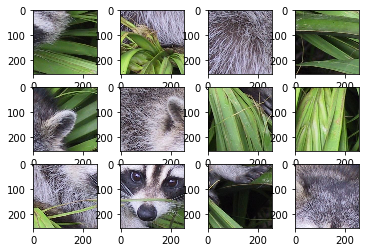


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Digite el par de piezas a intercambiar

Posición 1ra pieza: 10
Posición 2da pieza: 7

*Las piezas 10 y 7 han sido intercambiados*


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['8' '5' '1' '12']
 ['4' '2' '7' '9']
 ['6' '10' '11' '3']]

Tablero del Mapache



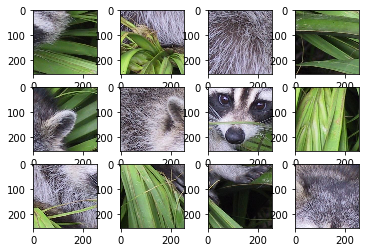


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 2

Digite el par de piezas a intercambiar

Posición 1ra pieza: 13
Posición 2da pieza: 2
*El elemento no esta en la lista*


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['8' '5' '1' '12']
 ['4' '2' '7' '9']
 ['6' '10' '11' '3']]

Tablero del Mapache



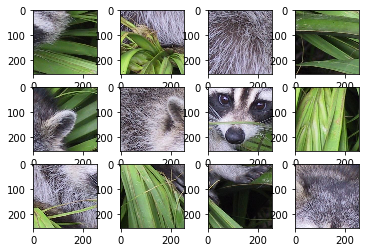


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 3

¡Entrada no valida!


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['8' '5' '1' '12']
 ['4' '2' '7' '9']
 ['6' '10' '11' '3']]

Tablero del Mapache



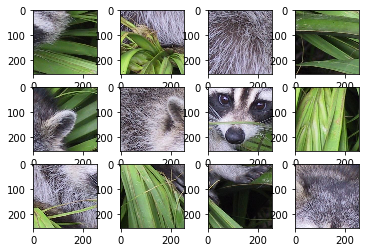


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir

Digite una opción: 3

¡Entrada no valida!


ROMPECABEZAS DEL MAPACHE

Posiciones de las piezas

[['8' '5' '1' '12']
 ['4' '2' '7' '9']
 ['6' '10' '11' '3']]

Tablero del Mapache



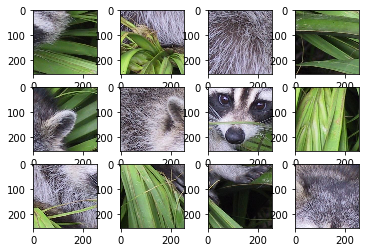


**MENU**

1 - Mostrar Mapache
2 - Intercambiar piezas
3 - Salir


In [ ]:
principal()